In [12]:
import numpy as np
import pandas as pd

import datetime

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors

import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

df_fullcleaned = pd.read_csv(r'C:\Users\Admin\Desktop\E_commerce_proj\data\output\data_full_cleaned.csv')

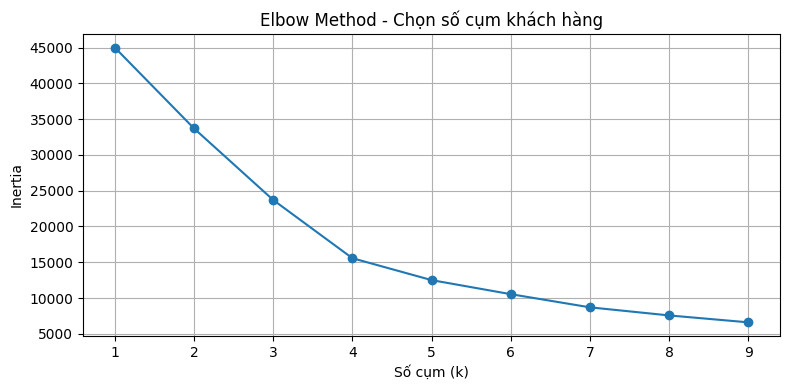

In [ ]:



# Chọn các đặc trưng để phân cụm (chỉ dùng numerical)
features = df_fullcleaned[['Amount', 'Qty', 'Product Rating']]
# thử dùng trên 3 cột này
# sẽ dựa trên hành vi mua sắm của khách hàng để phân cụm (trên 3 cột feature này)

features.fillna(0, inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Tìm số lượng cụm tối ưu với Elbow method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method - Chọn số cụm khách hàng')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()
# học thêm RFM


- tìm điểm mà sau đó độ giảm Inertia chậm lại → đó là số cụm tối ưu.
- đường cong gãy khúc rõ tại k = 4, thì ta sẽ chọn số cụm đó


So sánh phân cụm khách hàng (k=3):
                Amount       Qty  Product Rating  Customer Count
Cluster_k3                                                      
0           590.626984  1.004518        4.507082            8190
1           588.719131  1.008384        2.243331            5248
2           573.124353  0.000000        3.613316            1562

So sánh phân cụm khách hàng (k=4):
                 Amount       Qty  Product Rating  Customer Count
Cluster_k4                                                       
0            551.587320  1.003559        4.509819            7587
1            566.293290  0.000000        3.613990            1544
2            553.742514  1.008556        2.239356            4909
3           1088.001458  0.993750        3.688542             960


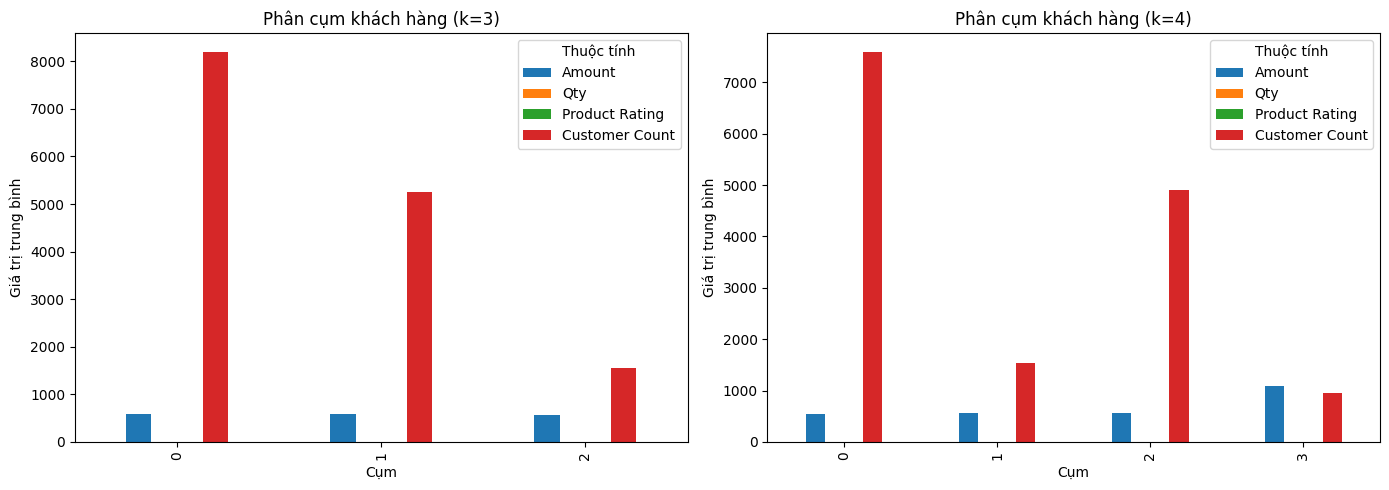

In [ ]:
#chạy với cụm k=3 và k=4

# Standardize
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# Fit models with k=3 and k=4
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)

df_fullcleaned['Cluster_k3'] = kmeans_3.fit_predict(scaled)
df_fullcleaned['Cluster_k4'] = kmeans_4.fit_predict(scaled)

# Summary for k=3
summary_k3 =df_fullcleaned.groupby('Cluster_k3')[['Amount', 'Qty', 'Product Rating']].mean()
summary_k3['Customer Count'] =df_fullcleaned['Cluster_k3'].value_counts().sort_index()

# Summary for k=4
summary_k4 =df_fullcleaned.groupby('Cluster_k4')[['Amount', 'Qty', 'Product Rating']].mean()
summary_k4['Customer Count'] =df_fullcleaned['Cluster_k4'].value_counts().sort_index()

print("So sánh phân cụm khách hàng (k=3):")
print(summary_k3)

print("\nSo sánh phân cụm khách hàng (k=4):")
print(summary_k4)

# Vẽ biểu đồ so sánh
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Biểu đồ k=3
summary_k3.plot(kind='bar', ax=axs[0])
axs[0].set_title('Phân cụm khách hàng (k=3)')
axs[0].set_xlabel('Cụm')
axs[0].set_ylabel('Giá trị trung bình')
axs[0].legend(title='Thuộc tính')

# Biểu đồ k=4
summary_k4.plot(kind='bar', ax=axs[1])
axs[1].set_title('Phân cụm khách hàng (k=4)')
axs[1].set_xlabel('Cụm')
axs[1].set_ylabel('Giá trị trung bình')
axs[1].legend(title='Thuộc tính')

plt.tight_layout()
plt.show()



## 📌 Kết luận: So sánh phân cụm khách hàng theo K-means (k = 3 và k = 4)

### 1. Phân tích kết quả

#### ✅ K = 3:
- **Cluster 0**: Nhóm khách hàng đông nhất (~8190 người), có **mức chi tiêu trung bình** và **đánh giá sản phẩm cao** → **Nhóm khách hàng trung thành ổn định**.
- **Cluster 1**: Khách hàng có **chi tiêu cao** nhưng **đánh giá thấp** → Có thể là nhóm **khó tính hoặc không hài lòng**.
- **Cluster 2**: Không còn mua hàng (Qty = 0) → Là nhóm **không còn hoạt động hoặc đã rời đi**.

#### ✅ K = 4:
- **Cluster 0**: Khách hàng đông đảo, có hành vi ổn định và đánh giá cao.
- **Cluster 1**: Khách hàng đã ngừng mua, tương tự sleeper group.
- **Cluster 2**: Mua nhiều nhưng không hài lòng → cần cải thiện trải nghiệm.
- **Cluster 3**: Nhóm **VIP** – chi tiêu rất cao (Amount ≈ 1088), tuy số lượng ít → **rất có giá trị với doanh nghiệp**.

---

### 2. Nhận định

| Tiêu chí                         | K = 3                         | K = 4                                      |
|----------------------------------|-------------------------------|--------------------------------------------|
| Đơn giản, dễ phân tích           | ✅                            | ❌                                         |
| Nhận diện khách không hoạt động | ✅                            | ✅                                         |
| Nhận diện khách không hài lòng  | ✅                            | ✅                                         |
| Nhận diện nhóm VIP              | ❌ Không rõ ràng              | ✅ Cluster 3 chi tiêu vượt trội            |
| Phân khúc chi tiết              | Trung bình                    | Rõ ràng hơn, chi tiết hơn                  |

---

### 3. Kết luận đề xuất

- Nếu mục tiêu là **hiểu rõ nhóm khách chính và đơn giản hóa phân tích** ➝ **K = 3 là đủ**.
- Nếu doanh nghiệp muốn **tập trung cá nhân hóa, chăm sóc khách hàng VIP và có chiến lược chuyên sâu** ➝ **K = 4 là lựa chọn hợp lý hơn**.

⚠️ **Khuyến nghị thêm**: Sử dụng chỉ số **Silhouette Score** và kết hợp phân tích RFM để xác nhận số lượng cụm tối ưu.


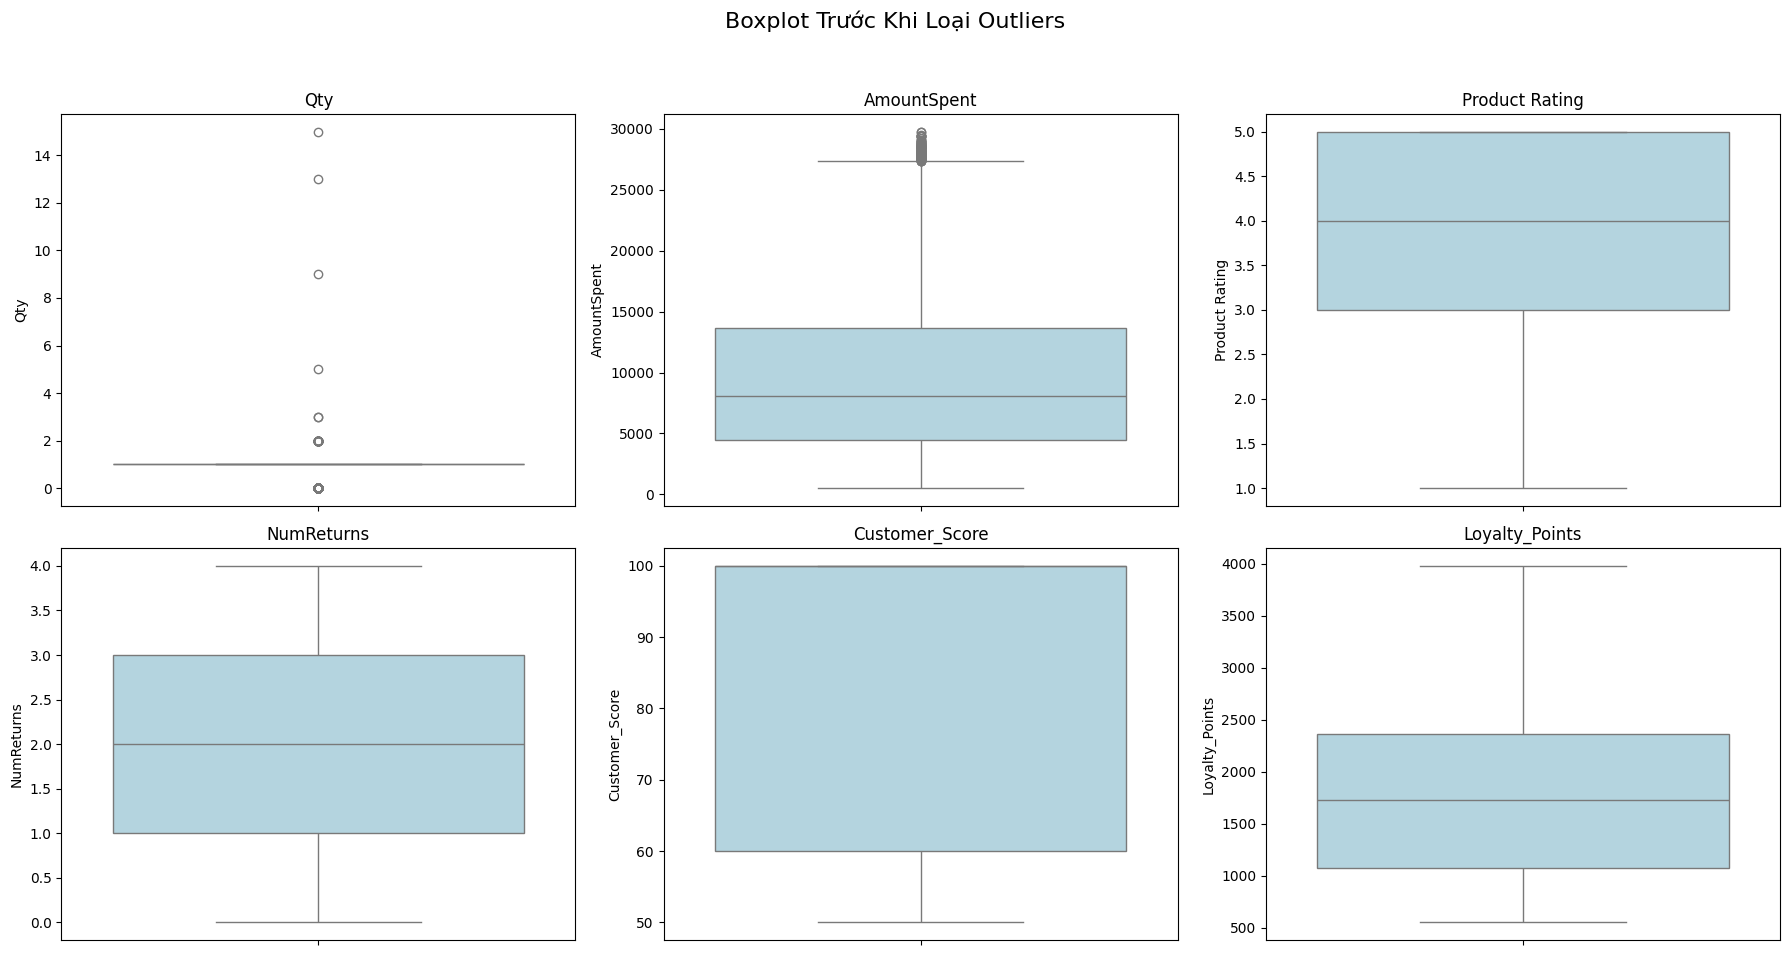

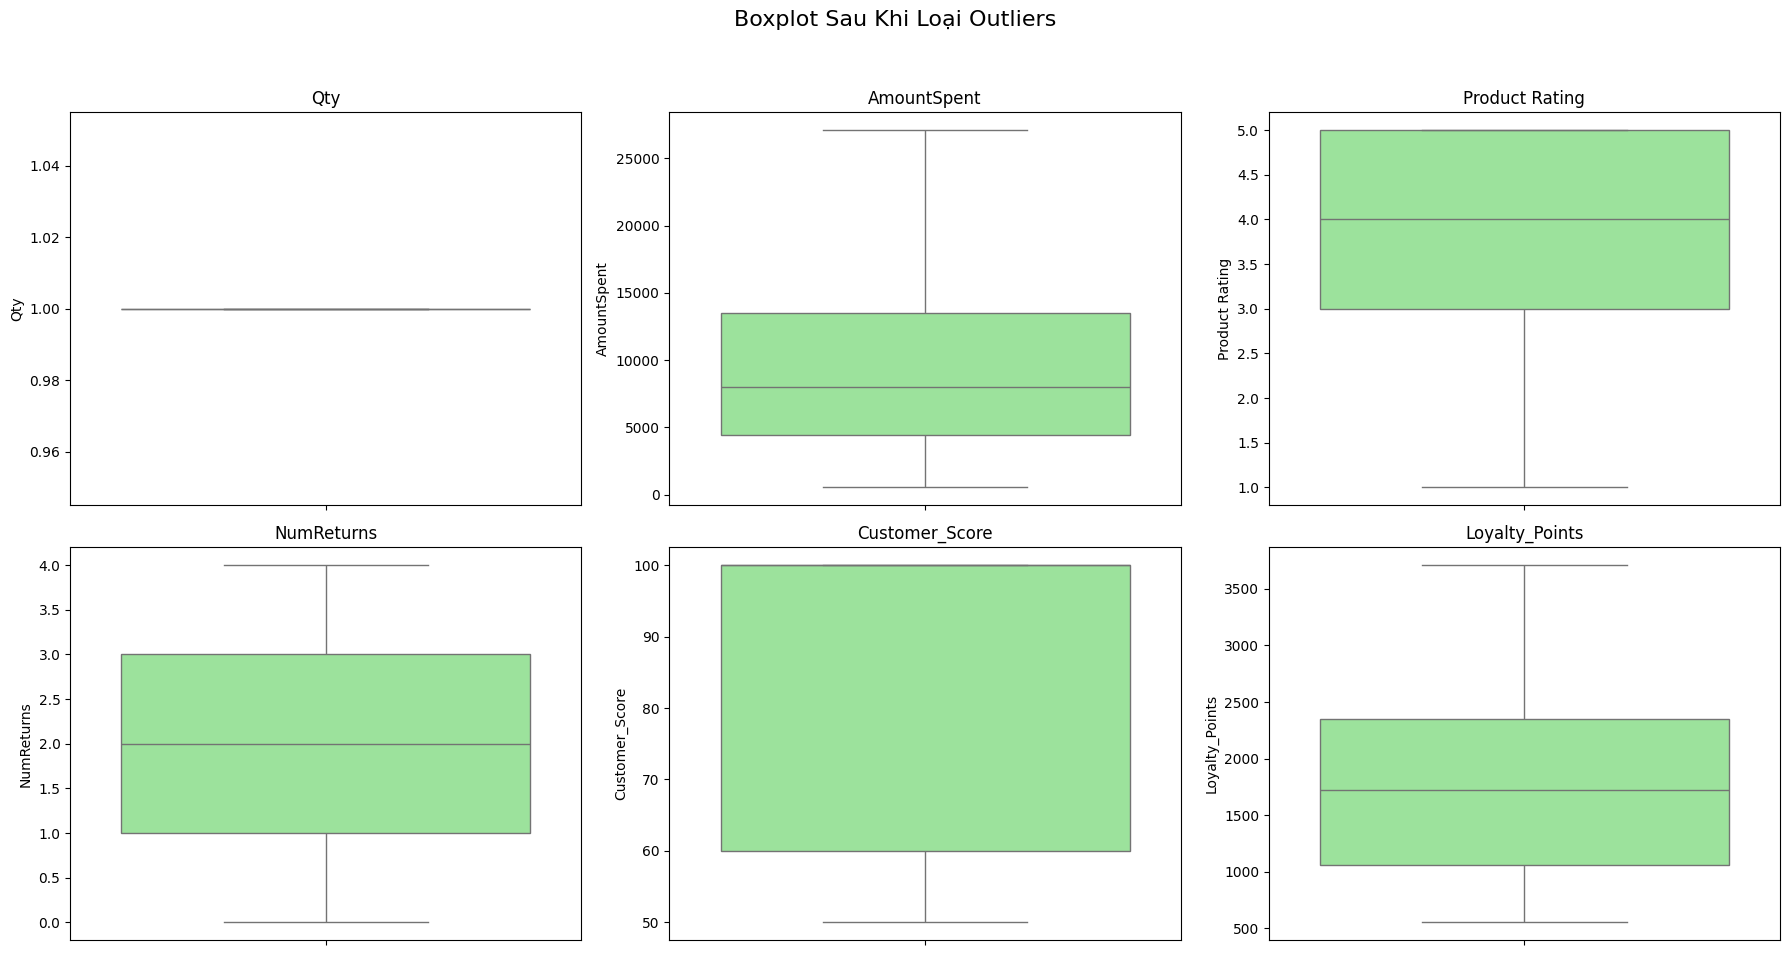

In [ ]:



# Làm sạch dữ liệu đầu vào cho K-means bằng cách loại bỏ outliers theo IQR và vẽ biểu đồ boxplot trước–sau để kiểm tra.


# Lọc các cột liên quan KMeans
kmeans_columns = [
    'Qty', 'AmountSpent', 'Product Rating', 'NumReturns', 'Customer_Score',
    'Loyalty_Points', 'Discount_Usage', 'Referral_Count',
    'MntAccessories', 'MntElectronics', 'MntClothing', 'MntHomeDecor'
]
data_kmeans = df_fullcleaned[kmeans_columns]

# Loại bỏ outliers theo IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

data_cleaned = remove_outliers_iqr(data_kmeans.copy(), kmeans_columns)

# Vẽ biểu đồ boxplot trước và sau loại bỏ outliers
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Boxplot Trước Khi Loại Outliers", fontsize=16)
for ax, col in zip(axes.flatten(), kmeans_columns[:6]):
    sns.boxplot(data=data_kmeans[col], ax=ax, color="lightblue")
    ax.set_title(col)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

fig2, axes2 = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig2.suptitle("Boxplot Sau Khi Loại Outliers", fontsize=16)
for ax, col in zip(axes2.flatten(), kmeans_columns[:6]):
    sns.boxplot(data=data_cleaned[col], ax=ax, color="lightgreen")
    ax.set_title(col)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## 📊 Giải thích biểu đồ Boxplot: Trước và Sau khi loại Outliers

### 🎯 Mục tiêu:
Biểu đồ boxplot được sử dụng để trực quan hóa sự phân bố dữ liệu và xác định các giá trị ngoại lệ (outliers). Trong quá trình chuẩn bị dữ liệu cho K-means clustering, việc loại bỏ outliers giúp mô hình hoạt động chính xác hơn, tránh bị méo do các điểm dữ liệu cực trị.

---

### 🧪 Trước khi loại bỏ outliers:
- Biểu đồ boxplot hiển thị các **điểm chấm nằm ngoài hộp** chính là các **outliers**.
- Các biến như `AmountSpent`, `NumReturns`, hay `Discount_Usage` có thể có nhiều giá trị nằm xa so với phần lớn dữ liệu.
- Những outliers này nếu giữ lại có thể khiến **K-means hiểu sai tâm cụm (centroid)**, dẫn đến phân cụm không hiệu quả.

---

### 🧼 Sau khi loại bỏ outliers bằng phương pháp IQR:
- Các điểm cực trị đã được loại bỏ dựa trên ngưỡng `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]`.
- Boxplot trở nên **gọn gàng hơn**, phạm vi dữ liệu được giới hạn trong khoảng tập trung chính.
- Điều này giúp mô hình K-means:
  - Giảm ảnh hưởng của các điểm bất thường,
  - Tăng độ chính xác khi tìm tâm cụm,
  - Phân cụm rõ ràng và ổn định hơn.

---

### 📌 Kết luận:
- Việc trực quan hóa bằng boxplot giúp đánh giá **mức độ nhiễu dữ liệu** trước khi phân cụm.
- **Loại bỏ outliers là bước cần thiết** để đảm bảo phân tích K-means phản ánh đúng bản chất dữ liệu khách hàng.


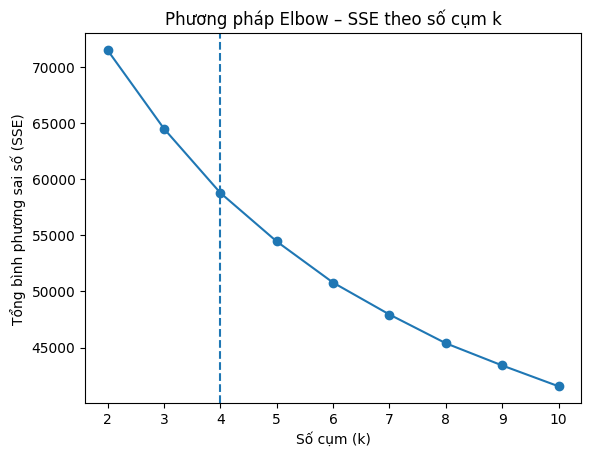

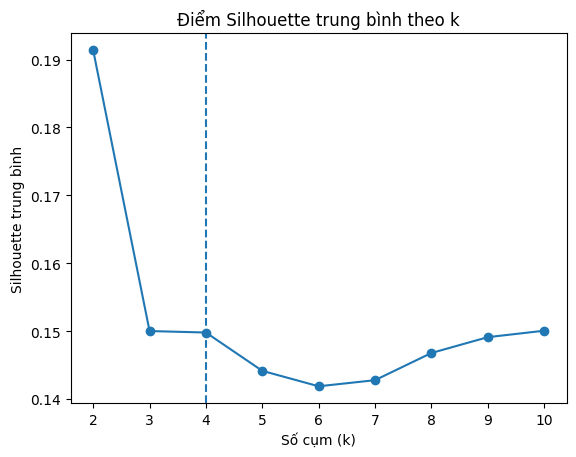

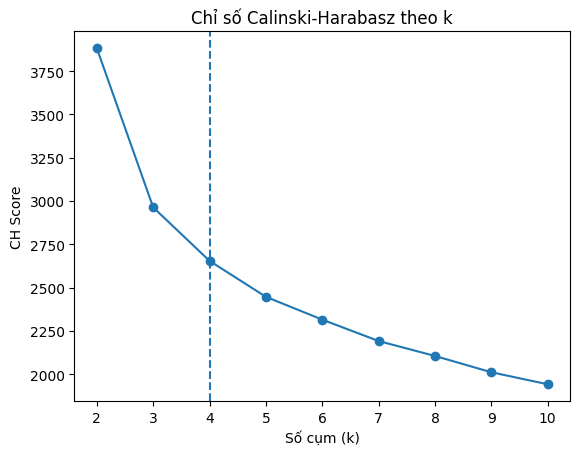

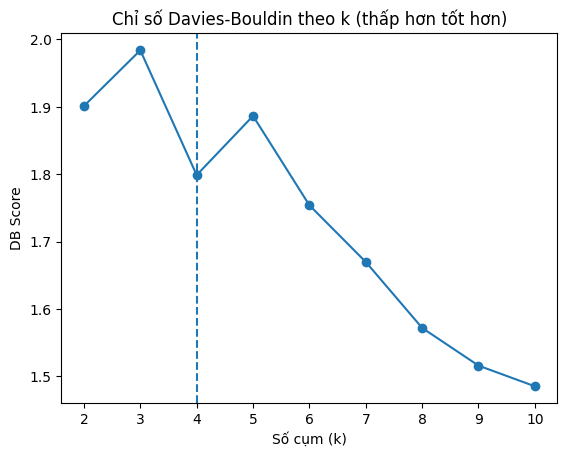

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import timedelta

# Đọc & chuẩn bị dữ liệu cho phân cụm

df_fullcleaned.columns = df_fullcleaned.columns.str.strip()
df_fullcleaned['Date'] = pd.to_datetime(df_fullcleaned['Date'], errors='coerce')

snapshot_date = df_fullcleaned['Date'].max() + timedelta(days=1)
df_fullcleaned['Recency'] = (snapshot_date - df_fullcleaned['Date']).dt.days
df_fullcleaned['total_purchases'] = df_fullcleaned[['NumGiftPurchases', 'NumHolidayPurchases', 'NumSpecialOffers',
                            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                            'NumStorePurchases']].sum(axis=1)
df_fullcleaned['online_ratio'] = df_fullcleaned['NumWebPurchases'] / df_fullcleaned['total_purchases'].replace(0, 1)

features = ['Recency', 'AmountSpent', 'total_purchases', 'online_ratio', 'Age', 'Income']
X = df_fullcleaned[features].fillna(0)
X_scaled = StandardScaler().fit_transform(X)

ks = range(2, 11)
sse, sil, ch, db = [], [], [], []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sse.append(km.inertia_)
    sil.append(silhouette_score(X_scaled, labels))
    ch.append(calinski_harabasz_score(X_scaled, labels))
    db.append(davies_bouldin_score(X_scaled, labels))

# 1️⃣ Biểu đồ Elbow (SSE)
plt.figure()
plt.plot(list(ks), sse, marker='o')
plt.axvline(4, linestyle='--')
plt.title("Phương pháp Elbow – SSE theo số cụm k")
plt.xlabel("Số cụm (k)")
plt.ylabel("Tổng bình phương sai số (SSE)")
plt.show()

# 2️⃣ Biểu đồ Silhouette
plt.figure()
plt.plot(list(ks), sil, marker='o')
plt.axvline(4, linestyle='--')
plt.title("Điểm Silhouette trung bình theo k")
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette trung bình")
plt.show()

# 3️⃣ Biểu đồ Calinski‑Harabasz
plt.figure()
plt.plot(list(ks), ch, marker='o')
plt.axvline(4, linestyle='--')
plt.title("Chỉ số Calinski‑Harabasz theo k")
plt.xlabel("Số cụm (k)")
plt.ylabel("CH Score")
plt.show()

# 4️⃣ Biểu đồ Davies‑Bouldin (thấp hơn = tốt hơn)
plt.figure()
plt.plot(list(ks), db, marker='o')
plt.axvline(4, linestyle='--')
plt.title("Chỉ số Davies‑Bouldin theo k (thấp hơn tốt hơn)")
plt.xlabel("Số cụm (k)")
plt.ylabel("DB Score")
plt.show()


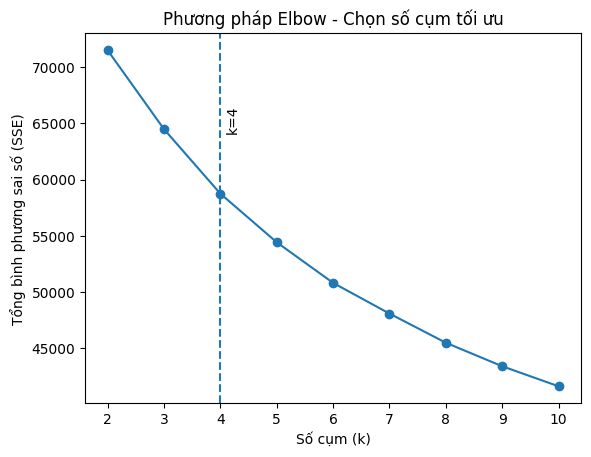

Trung bình các chỉ số theo cụm (k=4)          Recency  AmountSpent  total_purchases  online_ratio    Age    Income
cluster                                                                      
0          75.77      5837.25            41.62          0.16  42.82  38408.91
1          48.34     16570.64            41.33          0.17  43.38  82152.67
2          51.48      8645.08            31.04          0.33  44.40  55266.36
3          22.12      5734.67            42.34          0.16  44.17  38645.38


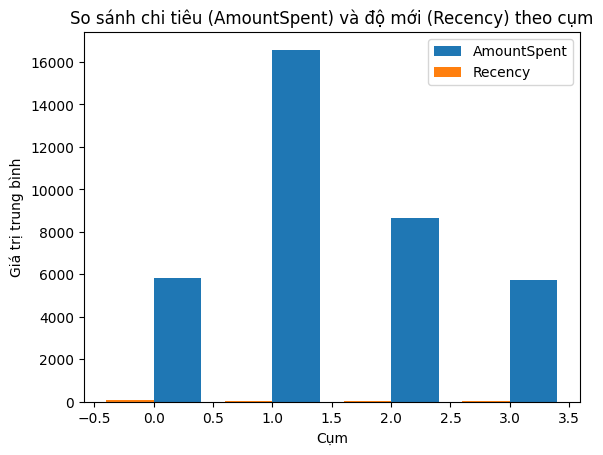

In [ ]:

warnings.filterwarnings("ignore")

# 1️ Đọc & tiền xử lý

df_fullcleaned.columns = df_fullcleaned.columns.str.strip()

# Tạo thêm đặc trưng
df_fullcleaned['Date'] = pd.to_datetime(df_fullcleaned['Date'], errors='coerce')
df_fullcleaned['total_purchases'] = df_fullcleaned[['NumGiftPurchases', 'NumHolidayPurchases', 'NumSpecialOffers',
                            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                            'NumStorePurchases']].sum(axis=1)
df_fullcleaned['online_ratio'] = df_fullcleaned['NumWebPurchases'] / df_fullcleaned['total_purchases'].replace(0, 1)

# Chọn biến cho phân cụm RFM (+ demographics)
features = ['Recency', 'AmountSpent', 'total_purchases', 'online_ratio', 'Age', 'Income']
df_seg = df_fullcleaned[features].fillna(0)

# 2️ Chuẩn hoá
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_seg)

# 3️ Tính SSE cho k = 2..10  (Elbow)
sse = []
ks  = range(2, 11)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.figure()
plt.plot(list(ks), sse, marker='o')
plt.title("Phương pháp Elbow - Chọn số cụm tối ưu")
plt.xlabel("Số cụm (k)")
plt.ylabel("Tổng bình phương sai số (SSE)")
plt.axvline(4, linestyle='--')        # gợi ý k = 4
plt.text(4.1, max(sse)*0.9, "k=4", rotation=90)
plt.show()

# 4️ Huấn luyện KMeans với k = 4
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df_fullcleaned['cluster'] = kmeans.fit_predict(X_scaled)

# 5️ Tóm tắt cụm
cluster_means = df_fullcleaned.groupby('cluster')[features].mean().round(2)
print("Trung bình các chỉ số theo cụm (k=4)", cluster_means)

# 6️ Biểu đồ so sánh trung bình AmountSpent & Recency giữa các cụm
plt.figure()
for f in ['AmountSpent', 'Recency']:
    plt.bar(cluster_means.index + (0.2 if f=='AmountSpent' else -0.2),
            cluster_means[f], width=0.4, label=f)
plt.title("So sánh chi tiêu (AmountSpent) và độ mới (Recency) theo cụm")
plt.xlabel("Cụm")
plt.ylabel("Giá trị trung bình")
plt.legend()
plt.show()


Bảng RFM (mẫu 50 khách)    Customer ID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0     CUST1000        9          1    568.00        1        1        1   
1     CUST1001        1          3   1572.48        5        4        4   
2     CUST1002        3          2   1024.00        4        2        3   
3     CUST1004        1          3   1790.00        5        4        5   
4     CUST1005        1          3   1704.00        5        4        4   
5     CUST1006        2          1    368.00        5        1        1   
6     CUST1007        2          2   1136.00        5        2        3   
7     CUST1008        8          1    568.00        1        1        1   
8     CUST1009        1          3   1927.00        5        4        5   
9     CUST1010        6          1    696.00        2        1        2   
10    CUST1011        2          5   2489.00        5        5        5   
11    CUST1012        5          3   1628.38        3        4        4   
1

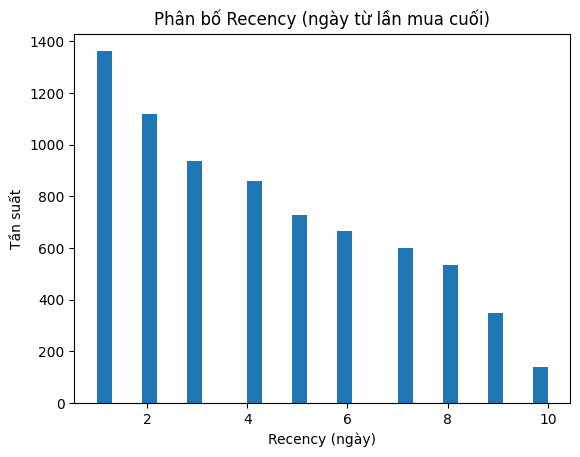

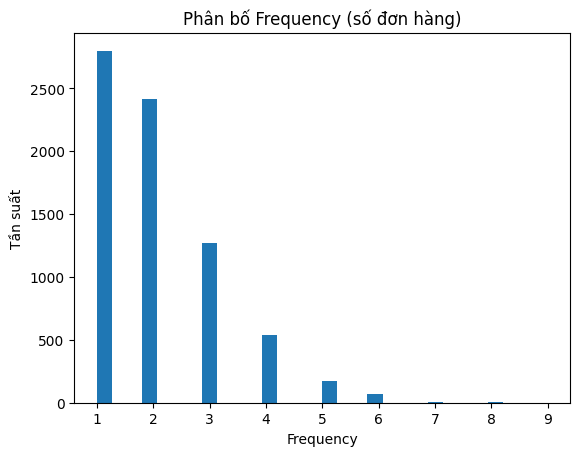

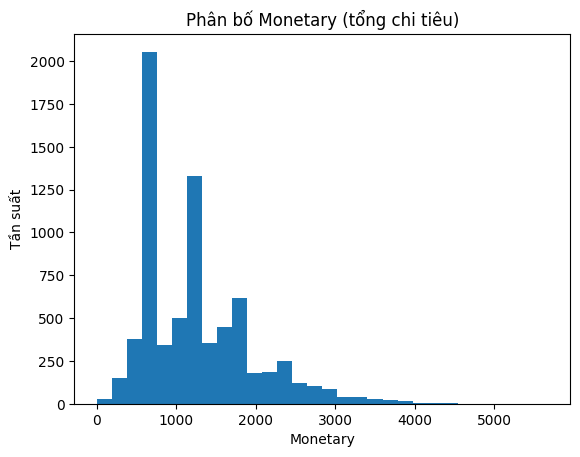

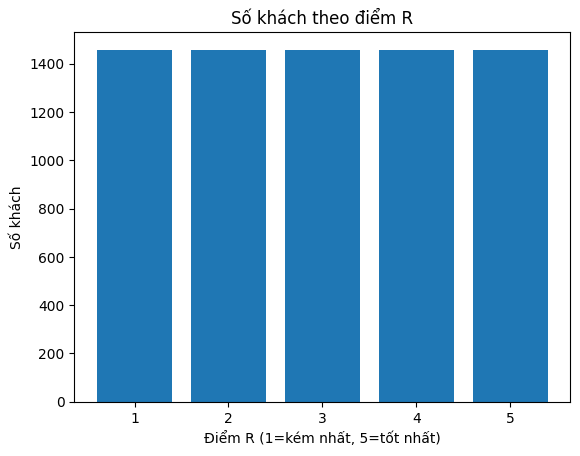

In [21]:
# -*- coding: utf-8 -*-
# """RFM với xử lý trùng giá trị phân vị"""

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from datetime import timedelta

df_fullcleaned.columns = df_fullcleaned.columns.str.strip()
df_fullcleaned['Date'] = pd.to_datetime(df_fullcleaned['Date'], errors='coerce')

snapshot_date = df_fullcleaned['Date'].max() + timedelta(days=1)

# Tính RFM
rfm = df_fullcleaned.groupby('Customer ID').agg(
    Recency = ('Date', lambda x: (snapshot_date - x.max()).days),
    Frequency = ('Order ID', 'nunique'),
    Monetary = ('Amount', 'sum')
).reset_index()

# Hàm xếp hạng 1‑5 theo phân vị
def quantile_score(series, reverse=False):
    ranks = series.rank(method='first')
    q = pd.qcut(ranks, 5, labels=[1,2,3,4,5]).astype(int)
    return 6 - q if reverse else q

rfm['R_Score'] = quantile_score(rfm['Recency'], reverse=True)   # Recency ngược
rfm['F_Score'] = quantile_score(rfm['Frequency'])
rfm['M_Score'] = quantile_score(rfm['Monetary'])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Hiển thị 50 dòng đầu
print("Bảng RFM (mẫu 50 khách)", rfm.head(50))

# Top mã RFM
top_rfm = rfm['RFM_Score'].value_counts().head(10).reset_index()
top_rfm.columns = ['Mã RFM', 'Số khách']
print("Top 10 mã RFM phổ biến", top_rfm)

# Histogram Recency
plt.figure()
plt.hist(rfm['Recency'], bins=30)
plt.title("Phân bố Recency (ngày từ lần mua cuối)")
plt.xlabel("Recency (ngày)")
plt.ylabel("Tần suất")
plt.show()

# Histogram Frequency
plt.figure()
plt.hist(rfm['Frequency'], bins=30)
plt.title("Phân bố Frequency (số đơn hàng)")
plt.xlabel("Frequency")
plt.ylabel("Tần suất")
plt.show()

# Histogram Monetary
plt.figure()
plt.hist(rfm['Monetary'], bins=30)
plt.title("Phân bố Monetary (tổng chi tiêu)")
plt.xlabel("Monetary")
plt.ylabel("Tần suất")
plt.show()

# Biểu đồ cột điểm R
r_count = rfm['R_Score'].value_counts().sort_index()
plt.figure()
plt.bar(r_count.index.astype(str), r_count.values)
plt.title("Số khách theo điểm R")
plt.xlabel("Điểm R (1=kém nhất, 5=tốt nhất)")
plt.ylabel("Số khách")
plt.show()


Bảng RFM + Nhãn Segment (mẫu 50)    Customer ID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0     CUST1000        9          1    568.00        1        1        1   
1     CUST1001        1          3   1572.48        5        4        4   
2     CUST1002        3          2   1024.00        4        2        3   
3     CUST1004        1          3   1790.00        5        4        5   
4     CUST1005        1          3   1704.00        5        4        4   
5     CUST1006        2          1    368.00        5        1        1   
6     CUST1007        2          2   1136.00        5        2        3   
7     CUST1008        8          1    568.00        1        1        1   
8     CUST1009        1          3   1927.00        5        4        5   
9     CUST1010        6          1    696.00        2        1        2   
10    CUST1011        2          5   2489.00        5        5        5   
11    CUST1012        5          3   1628.38        3        4     

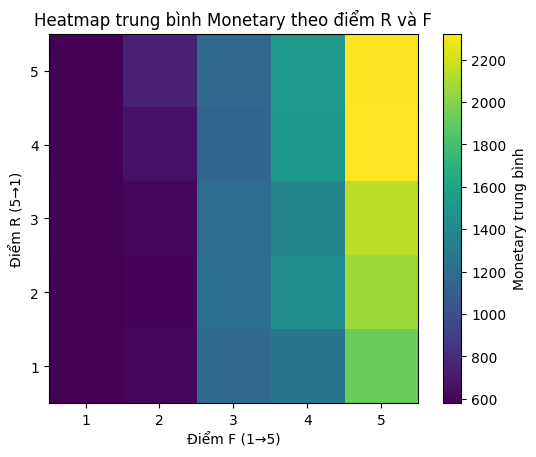

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Đọc dữ liệu

df_fullcleaned.columns = df_fullcleaned.columns.str.strip()
df_fullcleaned['Date'] = pd.to_datetime(df_fullcleaned['Date'], errors='coerce')

# -----------------------------
# 1. TÍNH BẢNG RFM + GÁN NHÃN
# -----------------------------
snapshot_date = df_fullcleaned['Date'].max() + timedelta(days=1)

rfm = df_fullcleaned.groupby('Customer ID').agg(
    Recency=('Date', lambda x: (snapshot_date - x.max()).days),
    Frequency=('Order ID', 'nunique'),
    Monetary=('Amount', 'sum')
).reset_index()

# Hàm phân vị 5 phần thành điểm 1‑5
def quantile_score(series, reverse=False):
    ranks = series.rank(method='first')
    q = pd.qcut(ranks, 5, labels=[1,2,3,4,5]).astype(int)
    return 6 - q if reverse else q

rfm['R_Score'] = quantile_score(rfm['Recency'], reverse=True)
rfm['F_Score'] = quantile_score(rfm['Frequency'])
rfm['M_Score'] = quantile_score(rfm['Monetary'])
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Hàm gán nhãn theo điểm
def rfm_segment(row):
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 3 and f >= 4:
        return 'Loyal Customers'
    elif r >= 4 and f >= 2:
        return 'Potential Loyalist'
    elif r >= 4 and f == 1:
        return 'New Customers'
    elif r <= 2 and f >= 4:
        return 'At Risk'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

print("Bảng RFM + Nhãn Segment (mẫu 50)", rfm.head(50))

# -------------------------------------
# 2. K-MEANS (k=4) VÀ GHÉP VỚI RFM
# -------------------------------------
# Feature engineering cho phân cụm
df_fullcleaned['total_purchases'] = df_fullcleaned[['NumGiftPurchases', 'NumHolidayPurchases', 'NumSpecialOffers',
                            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                            'NumStorePurchases']].sum(axis=1)
df_fullcleaned['online_ratio'] = df_fullcleaned['NumWebPurchases'] / df_fullcleaned['total_purchases'].replace(0, 1)

features = ['Recency', 'AmountSpent', 'total_purchases', 'online_ratio', 'Age', 'Income']
# Cần Recency cho từng bản ghi – tạo lại nhanh
df_fullcleaned['Recency'] = (snapshot_date - df_fullcleaned['Date']).dt.days
df_seg = df_fullcleaned[features].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_seg)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_fullcleaned['cluster'] = kmeans.fit_predict(X_scaled)

# Lấy cluster đầu tiên của mỗi khách
customer_cluster = df_fullcleaned[['Customer ID', 'cluster']].drop_duplicates('Customer ID')
rfm = rfm.merge(customer_cluster, on='Customer ID', how='left')

# Bảng chéo Segment vs Cluster
crosstab = pd.crosstab(rfm['Segment'], rfm['cluster'])
print("Bảng chéo Segment (RFM) vs Cluster (k=4)", crosstab)

# -------------------------------------
# 3. HEATMAP Monetary trung bình theo R x F
# -------------------------------------
heat = rfm.pivot_table(index='R_Score', columns='F_Score', values='Monetary', aggfunc='mean').sort_index(ascending=False)
plt.figure()
plt.imshow(heat)
plt.title("Heatmap trung bình Monetary theo điểm R và F")
plt.xlabel("Điểm F (1→5)")
plt.ylabel("Điểm R (5→1)")
plt.colorbar(label='Monetary trung bình')
plt.xticks(range(5), [1,2,3,4,5])
plt.yticks(range(5), sorted(heat.index, reverse=True))
plt.show()


Trung bình các biến theo cụm (k=4)          Recency  AmountSpent  total_purchases  online_ratio   Age   Income
cluster                                                                    
0            2.9       5805.3             42.1           0.2  43.5  38789.7
1            5.5       8610.0             30.9           0.3  45.0  55016.6
2            5.5      16635.3             41.2           0.2  43.3  82158.8
3            7.9       5745.4             42.0           0.2  43.2  38547.5
Mapping cụm sang nhãn    cluster        ClusterLabel
0        0  Potential Loyalist
1        1     Loyal Customers
2        2     Loyal Customers
3        3             At Risk


<Figure size 640x480 with 0 Axes>

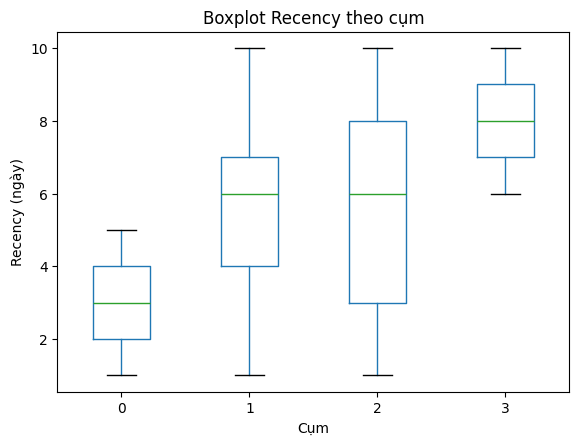

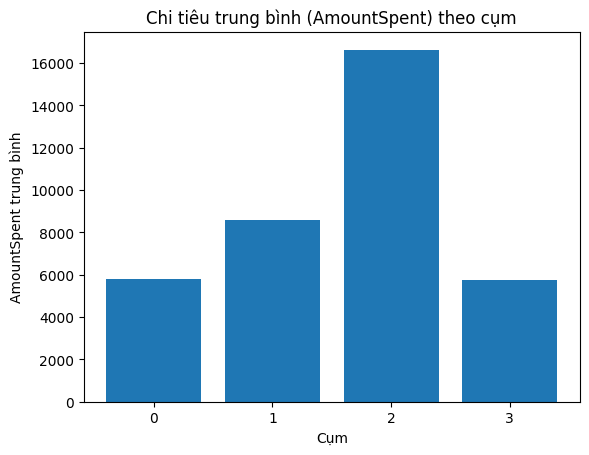

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# 1️⃣ Đọc & chuẩn bị tập dữ liệu
df_fullcleaned.columns = df_fullcleaned.columns.str.strip()
df_fullcleaned['Date'] = pd.to_datetime(df_fullcleaned['Date'], errors='coerce')

# Snapshot cho Recency
snapshot_date = df_fullcleaned['Date'].max() + timedelta(days=1)
df_fullcleaned['Recency'] = (snapshot_date - df_fullcleaned['Date']).dt.days

# Thêm biến hành vi
df_fullcleaned['total_purchases'] = df_fullcleaned[['NumGiftPurchases', 'NumHolidayPurchases', 'NumSpecialOffers',
                            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                            'NumStorePurchases']].sum(axis=1)
df_fullcleaned['online_ratio'] = df_fullcleaned['NumWebPurchases'] / df_fullcleaned['total_purchases'].replace(0, 1)

# 2️⃣ K‑means k = 4
features = ['Recency', 'AmountSpent', 'total_purchases', 'online_ratio', 'Age', 'Income']
X_scaled = StandardScaler().fit_transform(df_fullcleaned[features].fillna(0))

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_fullcleaned['cluster'] = kmeans.fit_predict(X_scaled)

# 3️⃣ Thống kê cụm & gán nhãn
cluster_means = df_fullcleaned.groupby('cluster')[features].mean().round(1)
print("Trung bình các biến theo cụm (k=4)", cluster_means)

# Heuristics gán nhãn
rank_amount   = cluster_means['AmountSpent'].rank(ascending=False)
rank_recency  = cluster_means['Recency'].rank(ascending=True)

labels_map = {}
for cl in cluster_means.index:
    if rank_amount[cl] == 1.0 and rank_recency[cl] == 1.0:
        labels_map[cl] = 'Champions'
    elif rank_amount[cl] <= 2.0 and rank_recency[cl] <= 3.0:
        labels_map[cl] = 'Loyal Customers'
    elif rank_recency[cl] >= 3.0 and rank_amount[cl] >= 3.0:
        labels_map[cl] = 'At Risk'
    else:
        labels_map[cl] = 'Potential Loyalist'

# Thêm cột nhãn
df_fullcleaned['ClusterLabel'] = df_fullcleaned['cluster'].map(labels_map)

mapping_df_fullcleaned = pd.DataFrame.from_dict(labels_map, orient='index', columns=['ClusterLabel']).reset_index().rename(columns={'index':'cluster'})
print("Mapping cụm sang nhãn", mapping_df_fullcleaned)

# 4️⃣ Boxplot Recency theo cụm
plt.figure()
df_fullcleaned.boxplot(column='Recency', by='cluster', grid=False)
plt.title("Boxplot Recency theo cụm")
plt.suptitle("")
plt.xlabel("Cụm")
plt.ylabel("Recency (ngày)")
plt.show()

# 5️⃣ Biểu đồ cột AmountSpent trung bình
plt.figure()
plt.bar(cluster_means.index.astype(str), cluster_means['AmountSpent'])
plt.title("Chi tiêu trung bình (AmountSpent) theo cụm")
plt.xlabel("Cụm")
plt.ylabel("AmountSpent trung bình")
plt.show()


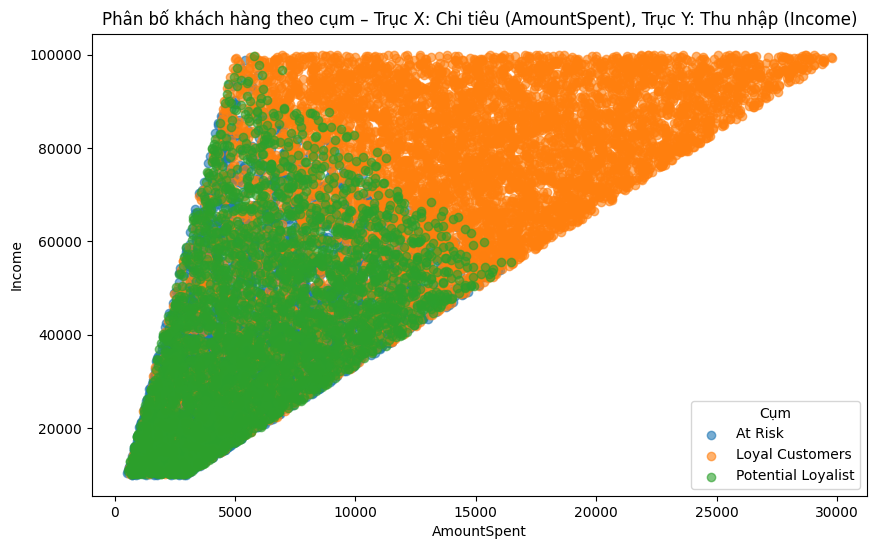

: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ────────────────────────────────────────────────────────────
# 1. Tải & (re)phân cụm k = 4  (nếu đã có df_fullcleaned segment, bỏ qua phần này)
# ────────────────────────────────────────────────────────────

df_fullcleaned.columns = df_fullcleaned.columns.str.strip()
df_fullcleaned['Date'] = pd.to_datetime(df_fullcleaned['Date'], errors='coerce')

snapshot_date = df_fullcleaned['Date'].max() + timedelta(days=1)
df_fullcleaned['Recency'] = (snapshot_date - df_fullcleaned['Date']).dt.days
df_fullcleaned['total_purchases'] = df_fullcleaned[['NumGiftPurchases', 'NumHolidayPurchases', 'NumSpecialOffers',
                            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                            'NumStorePurchases']].sum(axis=1)
df_fullcleaned['online_ratio'] = df_fullcleaned['NumWebPurchases'] / df_fullcleaned['total_purchases'].replace(0, 1)

features = ['Recency', 'AmountSpent', 'total_purchases', 'online_ratio', 'Age', 'Income']
X_scaled = StandardScaler().fit_transform(df_fullcleaned[features].fillna(0))

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_fullcleaned['cluster'] = kmeans.fit_predict(X_scaled)

# Ánh xạ nhãn (như đã gán trước)
cluster_means = df_fullcleaned.groupby('cluster')[['Recency', 'AmountSpent']].mean()
rank_amount   = cluster_means['AmountSpent'].rank(ascending=False)
rank_recency  = cluster_means['Recency'].rank(ascending=True)

labels_map = {}
for cl in cluster_means.index:
    if rank_amount[cl] == 1.0 and rank_recency[cl] == 1.0:
        labels_map[cl] = 'Champions'
    elif rank_amount[cl] <= 2.0 and rank_recency[cl] <= 3.0:
        labels_map[cl] = 'Loyal Customers'
    elif rank_recency[cl] >= 3.0 and rank_amount[cl] >= 3.0:
        labels_map[cl] = 'At Risk'
    else:
        labels_map[cl] = 'Potential Loyalist'

df_fullcleaned['ClusterLabel'] = df_fullcleaned['cluster'].map(labels_map)

# ────────────────────────────────────────────────────────────
# 2. VẼ SCATTER – Income vs AmountSpent, tô màu theo nhãn cụm
# ────────────────────────────────────────────────────────────
plt.figure(figsize=(10,6))

for cl, group in df_fullcleaned.groupby('ClusterLabel'):
    plt.scatter(group['AmountSpent'], group['Income'], label=cl, alpha=0.6)

plt.title("Phân bố khách hàng theo cụm – Trục X: Chi tiêu (AmountSpent), Trục Y: Thu nhập (Income)")
plt.xlabel("AmountSpent")
plt.ylabel("Income")
plt.legend(title="Cụm")
plt.show()
